# P2 Continuous ControlUdacity deep learning nano degree


In [1]:
from unityagents import UnityEnvironment
from agent import Agent
import torch
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Instantiate the Unity environment with the reacher simulation of 20 agents
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]      
action_size = brain.vector_action_space_size     
state = env_info.vector_observations[0]
state_size = len(state)
print("State space:", state_size, "\nAction space", action_size, "\n Initial State ", state )

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


State space: 33 
Action space 4 
 Initial State  [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [3]:
#Instantiate critic and actor 
agent = Agent(state_size=state_size, action_size=action_size)

In [4]:
def train_agents(n_episodes=300, max_t=1000, print_every=10, steps_to_learn=20, update_learn=20):
    scores_100_win = deque(maxlen=100)
    total_scores = []
    for i_episode in range(1, n_episodes+1):
        scores = np.zeros(20) #One score per agent
        #scores = np.empty(20)
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        #print(states)
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)
            #print(actions)
            env_info = env.step(actions)[brain_name]      
            next_states = env_info.vector_observations            
            rewards = env_info.rewards
            #print(rewards)
            scores += rewards
            dones = env_info.local_done 
            for i in range(len(states)):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            states = next_states
            #scores += rewards
            #print("scores: ", scores, "\n rewards: ", rewards)
            if t%steps_to_learn == 0:
                for _ in range(update_learn):
                    agent.startlearn()
            #if np.any(dones):
            #    print("breaking ", dones)
            #    break 
        
        mean_score = np.mean(scores)
        scores_100_win.append(mean_score)
        total_scores.append(mean_score)
        total_average_score = np.mean(scores_100_win)
        
        print('\rEpisode {}\tAverage Score: {:.2f} \t Min:{:.2f} \t Max:{:.2f}'.format(i_episode, total_average_score,
                                                                            np.min(scores), np.max(scores)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, total_average_score))
        
        '''
        if total_average_score >= 30:
            success_counter += 1
        if success_counter>=100:#the env is solved if the score is >30 in 100 consecutive episodes
            print("\nEnviroment Resolved in the episode {}!".format(i_episode))
            torch.save(agent.actor_local.state_dict(), 'final_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'final_critic.pth')
            break
        '''
        if (total_average_score >=30) and (len(scores_100_win)==100):
            print("\nEnviroment Resolved in the episode {}!".format(i_episode))
            torch.save(agent.actor_local.state_dict(), 'final_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'final_critic.pth')
            break
    return total_scores



In [5]:
#Run Training
scores = train_agents()

Episode 10	Average Score: 0.67 	 Min:0.25 	 Max:2.52
Episode 20	Average Score: 0.94 	 Min:0.22 	 Max:4.67
Episode 30	Average Score: 1.90 	 Min:1.50 	 Max:5.464
Episode 40	Average Score: 2.92 	 Min:2.46 	 Max:19.65
Episode 50	Average Score: 4.10 	 Min:5.17 	 Max:19.49
Episode 60	Average Score: 5.48 	 Min:6.66 	 Max:16.765
Episode 70	Average Score: 7.00 	 Min:15.02 	 Max:26.37
Episode 80	Average Score: 8.55 	 Min:8.42 	 Max:25.124
Episode 90	Average Score: 9.83 	 Min:18.18 	 Max:28.70
Episode 100	Average Score: 11.28 	 Min:3.77 	 Max:32.30
Episode 110	Average Score: 13.86 	 Min:21.85 	 Max:38.13
Episode 120	Average Score: 16.63 	 Min:23.53 	 Max:35.41
Episode 130	Average Score: 19.47 	 Min:26.28 	 Max:39.14
Episode 140	Average Score: 22.53 	 Min:35.25 	 Max:39.29
Episode 150	Average Score: 25.30 	 Min:29.72 	 Max:39.61
Episode 160	Average Score: 27.73 	 Min:33.59 	 Max:38.21
Episode 170	Average Score: 29.81 	 Min:31.29 	 Max:39.64
Episode 172	Average Score: 30.13 	 Min:29.08 	 Max:39.41


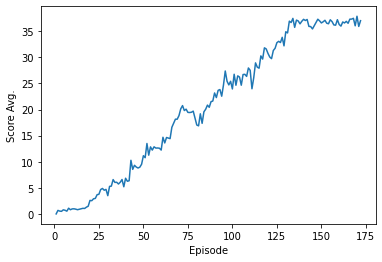

In [6]:
#Plot score graph
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score Avg.')
plt.xlabel('Episode')
plt.show()

In [5]:
#torch.save(agent.actor_local.state_dict(), 'final_actor.pth')
#torch.save(agent.critic_local.state_dict(), 'final_critic.pth')

In [7]:
env.close()